# dpr-np-smallset-model.tar.gz

## 1. 문장 비교
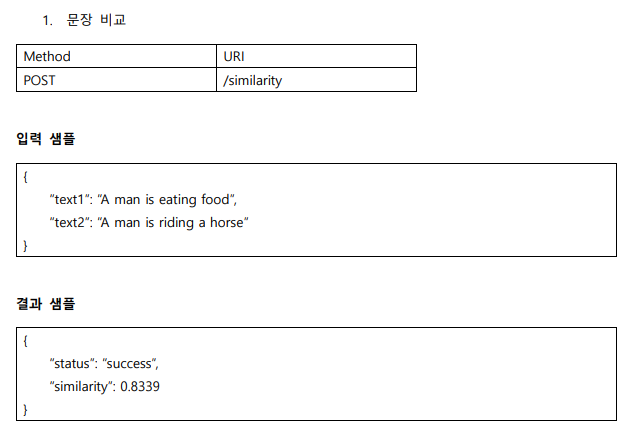

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 데이터 불러오기
!pip install transformers
from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer

tokenizer = DPRQuestionEncoderTokenizer.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
model = DPRQuestionEncoder.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
input_ids = tokenizer("Hello, is my dog cute ?", return_tensors="pt")["input_ids"]
embeddings = model(input_ids).pooler_output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.1 MB/s eta 0:00:00


In [ ]:
input_ids

tensor([[  101,  7592,  1010,  2003,  2026,  3899, 10140,  1029,   102]])

In [ ]:
embeddings

In [ ]:
import torch
from scipy import spatial

# 코사인 유사도 계산하는 함수
def calculate_cosine_similarity(embeddings1, embeddings2):
    cosine_similarity = 1 - spatial.distance.cosine(embeddings1.detach().numpy(), embeddings2.detach().numpy())
    return cosine_similarity

input_ids1 = tokenizer("Hello, is my dog cute ?", return_tensors="pt")["input_ids"]
embeddings1 = model(input_ids1).pooler_output
input_ids2 = tokenizer("Is my cat cute ?", return_tensors="pt")["input_ids"]
embeddings2 = model(input_ids2).pooler_output

# Calculate cosine similarity
cosine_similarity = calculate_cosine_similarity(embeddings1, embeddings2)
print("Cosine Similarity: ", np.round(cosine_similarity, 4))

Cosine Similarity:  0.9429


In [ ]:
# import torch
# from scipy import spatial

# 코사인 유사도 계산하는 함수
def calculate_cosine_similarity(input1, input2):
    
    input_ids1 = tokenizer(str(input1), return_tensors="pt")["input_ids"]
    input_ids2 = tokenizer(str(input2), return_tensors="pt")["input_ids"]
    embeddings1 = model(input_ids1).pooler_output
    embeddings2 = model(input_ids2).pooler_output
    
    cosine_similarity = 1 - spatial.distance.cosine(embeddings1.detach().numpy(), embeddings2.detach().numpy())
    
    return cosine_similarity

In [ ]:
cosine_similarity = calculate_cosine_similarity("He is lazy", "he is sincere")
print("status : success")
print("Similarity: ", np.round(cosine_similarity, 4))

status : success
Similarity:  0.6929


## 2. 색인
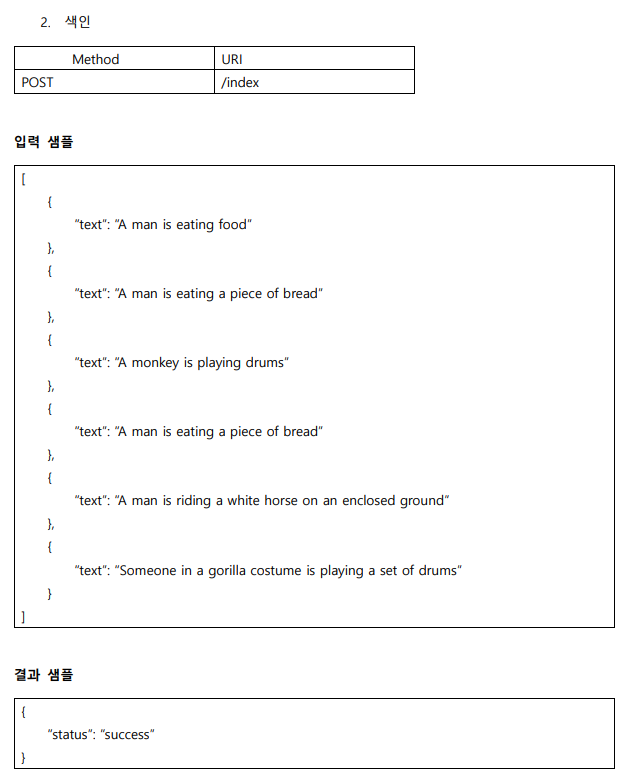

In [ ]:
input = [
    {'text': 'A man is eating food'},
    {'text': 'A man is eating a piece of bread'},
    {'text': 'A monkey is playing drums'},
    {'text': 'A man is eating a piece of bread'},
    {'text': 'A man is riding a white horse on an enclosed ground'},
    {'text': 'Someone in a gorilla costume is playing a set of drums'}
]

In [ ]:
input[0]

{'text': 'A man is eating food'}

In [ ]:
input[0].values()

dict_values(['A man is eating food'])

In [ ]:
text_df = pd.DataFrame(input)
#text_df['tokens'] = text_df['text'].str.split()
text_df

,text
0,A man is eating food
1,A man is eating a piece of bread
2,A monkey is playing drums
3,A man is eating a piece of bread
4,A man is riding a white horse on an enclosed g...
5,Someone in a gorilla costume is playing a set ...


In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


In [ ]:
text_df['text'][0]

'A man is eating food'

In [ ]:
import re

res = []

# txt 파일 읽어오기
with open('/content/drive/MyDrive/3차 프로젝트 (230125 ~ 230222)/2주차 과제/text.txt', 'r') as f:
  for line in f:
    text = re.sub(r'[^A-Za-z0-9]', ' ', line)
    text = re.sub(r'text', '', text)
    res.append(text.strip())
#print(res)

# parsing 한 결과 txt 파일로 저장
with open('/content/drive/MyDrive/3차 프로젝트 (230125 ~ 230222)/2주차 과제/text_parsing.txt', 'a') as f_out:
  for i in res:
    if i != '':
      f_out.write(i+'\n')

## 3. 검색
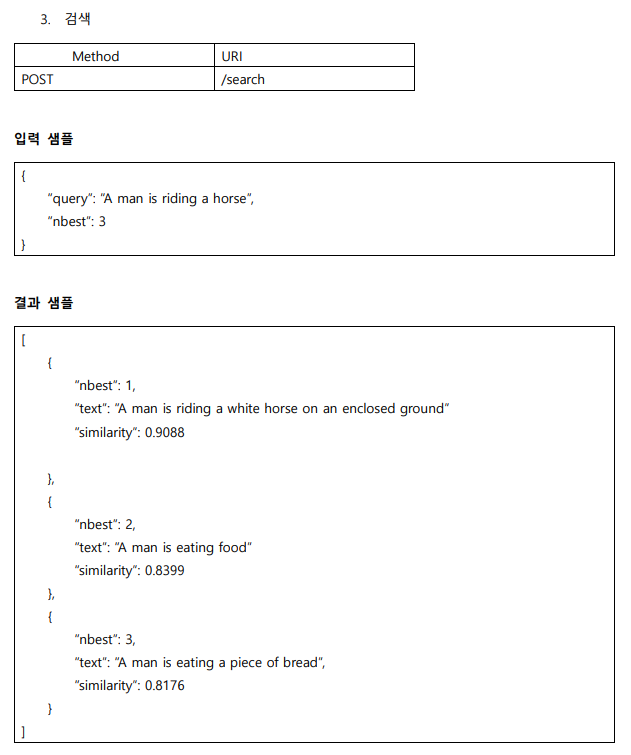

### DataFrame 사용

In [ ]:
"""
input = {
    'query' : 'A man is riding a horse',
    'nbest' : 3
}
"""

In [ ]:
input = [
    {'text': 'A man is eating food'},
    {'text': 'A man is eating a piece of bread'},
    {'text': 'A monkey is playing drums'},
    {'text': 'A man is eating a piece of bread'},
    {'text': 'A man is riding a white horse on an enclosed ground'},
    {'text': 'Someone in a gorilla costume is playing a set of drums'}
]

In [ ]:
input[0]

{'text': 'A man is eating food'}

In [ ]:
input[0].values()

dict_values(['A man is eating food'])

In [ ]:
text_df = pd.DataFrame(input)
#text_df['tokens'] = text_df['text'].str.split()
text_df

,text
0,A man is eating food
1,A man is eating a piece of bread
2,A monkey is playing drums
3,A man is eating a piece of bread
4,A man is riding a white horse on an enclosed g...
5,Someone in a gorilla costume is playing a set ...


In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


In [ ]:
text_df['text'][0]

'A man is eating food'

In [ ]:
# !pip install transformers
# from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer

tokenizer = DPRQuestionEncoderTokenizer.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
model = DPRQuestionEncoder.from_pretrained("facebook/dpr-question_encoder-single-nq-base")

In [ ]:
search = 'A man is riding a horse'

cos = []

for i in range(len(text_df)):
  input_ids1 = tokenizer(search, return_tensors="pt")["input_ids"]
  embeddings1 = model(input_ids1).pooler_output
  input_ids2 = tokenizer(text_df['text'][i], return_tensors="pt")["input_ids"]
  embeddings2 = model(input_ids2).pooler_output

  cosine_similarity = 1 - spatial.distance.cosine(embeddings1.detach().numpy(), embeddings2.detach().numpy())
  cos.append(np.round(cosine_similarity, 4))

text_df['cos_sim'] = cos
text_df.rename(columns={'text' : 'query: ' + search}, inplace=True)
text_df.sort_values(by='cos_sim', ascending=False)[:3].reset_index().iloc[:, 1:]

,query: A man is riding a horse,cos_sim
0,A man is riding a white horse on an enclosed g...,0.9159
1,A man is eating food,0.8330
2,A man is eating a piece of bread,0.8200


### txt 파일로 저장 후, with open() 사용



In [ ]:
!pip install transformers

import transformers
from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer

tokenizer = DPRQuestionEncoderTokenizer.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
model = DPRQuestionEncoder.from_pretrained("facebook/dpr-question_encoder-single-nq-base")

import torch
def calculate_cosine_similarity(input1, input2):
    input_ids = tokenizer(str(input1), return_tensors="pt")["input_ids"]
    input_ids2 = tokenizer(str(input2), return_tensors="pt")["input_ids"]
    embeddings = model(input_ids).pooler_output
    embeddings2 = model(input_ids2).pooler_output

    try:
        cosine_similarity = torch.nn.functional.cosine_similarity(embeddings,embeddings2)
        # print('"status”:“success"')
        # print('"simlarity" :', cosine_similarity.item())
        return cosine_similarity.item()
    except Exception as e:
        print('"status”:“fail"')
        return None

#calculate_cosine_similarity("Hello, is my dog cute ?", "Is my cat cute ?")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""
input = {
    'query' : 'A man is riding a horse',
    'nbest' : 3
}
"""

In [ ]:
import re
import json

# txt 파일 읽어오기
with open('/content/drive/MyDrive/3차 프로젝트 (230125 ~ 230222)/2주차 과제/text.txt') as f:
  contexts = f.read()
  contexts = re.sub(r'[“”]', '"', contexts)
  json_objs = json.loads(contexts)

#print(contexts)

"""
try:
  #data = json.loads("{}")
  json_objs = json.loads(contexts)
except json.JSONDecodeError as e:
  print("Error:", e)
"""

# 검색
input_text = input("문장 : ")
input_nbest = int(input("개수 : "))

for json_obj in json_objs:
  json_obj['similarity'] = calculate_cosine_similarity(input_text, json_obj['text'])
  #print(json_obj)

json_objs.sort(key=lambda x : -x['similarity'])
for i, json_obj in enumerate(json_objs):
  json_obj['nbest'] = i+1
  print(json_obj)
  if (i+1) == input_nbest: break;

문장 : A man is riding a horse
개수 : 3
{'text': 'A man is riding a white horse on an enclosed ground', 'similarity': 0.915939211845398, 'nbest': 1}
{'text': 'A man is eating food', 'similarity': 0.8329746127128601, 'nbest': 2}
{'text': 'A man is eating a piece of bread', 'similarity': 0.8200476169586182, 'nbest': 3}
